In [30]:
import numpy
!.\Scripts\activate
# !pip install tensorflow
!echo %VIRTUAL_ENV%
# !pip install torch
!pip install keras-core
# !pip install numpy
# !pip install matplotlib

C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obraz�"��"'w\lab3-GAN


In [24]:
import pip
pip.main(['install', 'tensorflow'])
# pip.main(['install', 'torch'])
# pip.main(['install', 'keras-core'])
# pip.main(['install','numpy'])
# pip.main(['install','matplotlib'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached protobuf-4.25.0-cp39-cp39-win_amd64.whl (413 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached grpcio-1.59.2-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 

ERROR: Could not install packages due to an OSError: [WinError 5] Odmowa dostępu: 'C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\rozpoznawanie_obrazów\\lab3-GAN\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obrazów\lab3-GAN\Scripts\python.exe -m pip install --upgrade pip' command.


1

In [35]:
import numpy as np
import os
from matplotlib import pyplot as plt
# plt.rcParams['image.cmap'] = 'gray'
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


In [222]:
discriminator = keras.models.Sequential([
    keras.layers.Input((32, 32, 3)),
    keras.layers.Conv2D(32, (4, 4), strides = 2, padding='same', activation=keras.layers.LeakyReLU(negative_slope=0.2),
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same', activation=keras.layers.LeakyReLU(negative_slope=0.2),
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same', activation=keras.layers.LeakyReLU(negative_slope=0.2),
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

discriminator.compile()
discriminator.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 16, 16, 32)        │      1,568 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_36          │ (None, 16, 16, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_54 (Conv2D)              │ (None, 8, 8, 64)          │     32,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_37          │ (None, 8, 8, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_55 (Conv2D)              │ (None, 4, 4, 64)          │     65,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_38          │ (None, 4, 4, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_17 (Dense)                │ (None, 1)                 │      1,025 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 101,665 (397.13 KB)

 Trainable params: 101,345 (395.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [223]:
GEN_INPUT_SIZE = 64

def toRGB(x):
    return (x+1)/2

generator = keras.models.Sequential([
    keras.layers.Input((GEN_INPUT_SIZE,)),
    keras.layers.Dense(1024),
    keras.layers.Reshape((4, 4, 64)),
    keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding="same", activation=keras.layers.LeakyReLU(negative_slope=0.2)),
    keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same", activation=keras.layers.LeakyReLU(negative_slope=0.2)),
    keras.layers.Conv2DTranspose(256, (4, 4), strides=2, padding="same", activation=keras.layers.LeakyReLU(negative_slope=0.2)),
    keras.layers.Conv2D(3, (5, 5), padding="same", activation='tanh'),
    keras.layers.Lambda(toRGB),
])

generator.compile()
generator.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape_9 (Reshape)             │ (None, 4, 4, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_24             │ (None, 8, 8, 64)          │     65,600 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_25             │ (None, 16, 16, 128)       │    131,200 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_26             │ (None, 32, 32, 256)       │    524,544 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 3)         │     19,203 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda_4 (Lambda)               │ (None, 32, 32, 3)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 807,107 (3.08 MB)

 Trainable params: 807,107 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.5269494 0.47940472
(1, 32, 32, 3)


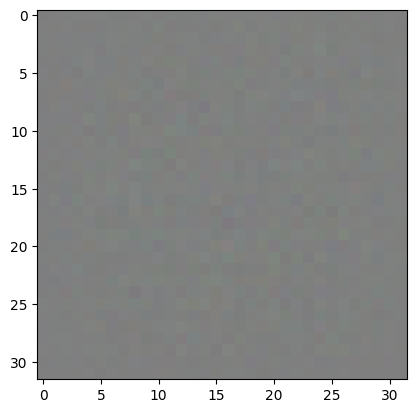

In [224]:
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()


In [225]:
import multiprocessing.pool
import tensorflow
import os
real_dataset = keras.utils.image_dataset_from_directory(
    "C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\crawled_cakes",
    labels=None,
    label_mode=None,
    image_size=(32, 32),
    batch_size=None,
)



Found 975 files belonging to 1 classes.


In [226]:
real_data = np.array(list(real_dataset))/255
# real_data.
# tensorflow.data.Dataset.as_numpy_iterator(
# )

(975, 32, 32, 3)
[[[0.45768613 0.56749004 0.7243528 ]
  [0.4661956  0.55247015 0.7054113 ]
  [0.49553844 0.5700483  0.726911  ]
  ...
  [0.47205883 0.5269608  0.62892157]
  [0.43308824 0.4997549  0.6073529 ]
  [0.47055376 0.5450291  0.6117992 ]]

 [[0.46887255 0.55514705 0.71593136]
  [0.47671568 0.5708333  0.7142157 ]
  [0.48090917 0.5872549  0.7411765 ]
  ...
  [0.52264476 0.6072036  0.72987515]
  [0.5026233  0.5743145  0.71218216]
  [0.48968673 0.56873083 0.64998084]]

 [[0.45512408 0.564928   0.72179073]
  [0.4945121  0.57404643 0.766816  ]
  [0.47145373 0.58725876 0.7433862 ]
  ...
  [0.5169539  0.5626609  0.60984606]
  [0.49865195 0.5731618  0.69080883]
  [0.4853937  0.5716682  0.6618643 ]]

 ...

 [[0.7574027  0.79269683 0.8123047 ]
  [0.7529412  0.78431374 0.79607844]
  [0.7382315  0.76568246 0.78921187]
  ...
  [0.78639704 0.82169116 0.80992645]
  [0.78039217 0.8        0.8117647 ]
  [0.76642156 0.78995097 0.78210783]]

 [[0.7529412  0.7882353  0.80784315]
  [0.75686276 0.7882

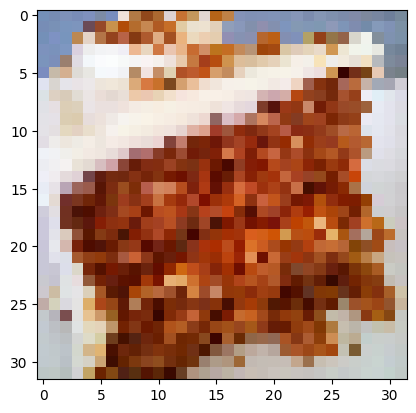

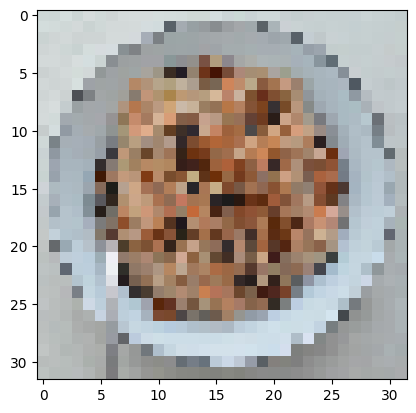

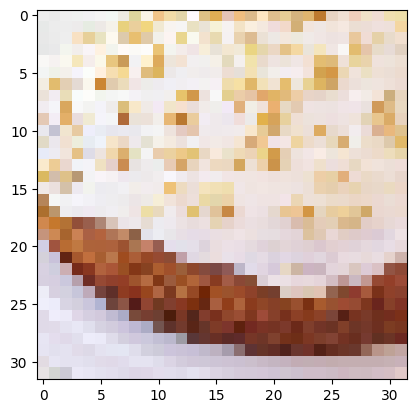

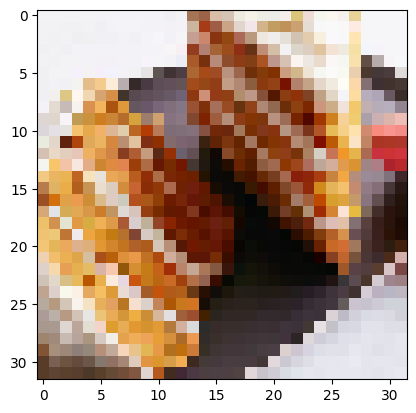

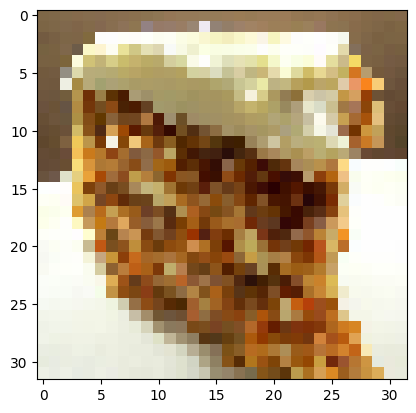

In [227]:
print(real_data.shape)
print(real_data[0])
for i in range(5):
    plt.imshow(real_data[i])
    plt.show()


Note that layers (such that BatchNorm) do the learning in forward phase, so you have to set them to eval() too

In [228]:
import torch
BATCH_SIZE = 32

y_real_data = np.ones(len(real_data))

real_dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(real_data), torch.from_numpy(y_real_data)
)

real_dataloader = torch.utils.data.DataLoader(
    real_dataset, batch_size=BATCH_SIZE//2, shuffle=True
)



In [229]:
def check_weights_change(org_dirscr_weights, org_gen_weights, discriminator_training: bool):
    if discriminator_training:
        print("discriminator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('WARNING the discriminator weights did not change')
        else:
            print("good, the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('good, the generator weights did not change')
        else:
            print("WARNING the generator weights layer changed")
    else:
        print("generator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('good, the discriminator weights did not change')
        else:
            print("WARNING the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('WARNING the generator weights did not change')
        else:
            print("good, the generator weights layer changed")

In [230]:
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())
generator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())

In [231]:
validation_input = np.random.default_rng(seed = 420).normal(0, 1, (25, GEN_INPUT_SIZE))

In [0]:
from datetime import datetime

def train_disciminator(real_inputs, real_targets):
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    generated_inputs = generator(random_inputs)

    x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
    y_train = keras.ops.append(
        real_targets - np.random.uniform(0, 0.05, real_targets.shape),
        np.random.uniform(0, 0.05, len(generated_inputs)),
        axis=0)
    # y_train += np.random.uniform(-0.05, 0.05, y_train.shape)
    outputs = discriminator(x_train)
    loss = discriminator.loss(y_train, outputs)

    discriminator.zero_grad()
    trainable_weights = [v for v in discriminator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        discriminator.optimizer.apply(gradients, trainable_weights)

    return loss

def train_generator():
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    x_gen_train = generator(random_inputs)
    y_gen_train = np.ones(len(x_gen_train))

    outputs = discriminator(x_gen_train)
    loss = generator.loss(y_gen_train, outputs)

    generator.zero_grad()
    trainable_weights = [v for v in generator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        generator.optimizer.apply(gradients, trainable_weights)

    return loss

In [235]:
discriminator.optimizer.learning_rate.assign(0.00001/2)

In [236]:
discriminator.optimizer.learning_rate

<KerasVariable shape=(), dtype=float32, path=adam/learning_rate>

epoch 251
Generator avg loss:     0.7143028378486633
Discriminator avg loss: 0.7107363343238831
epoch 252
Generator avg loss:     0.6933806538581848
Discriminator avg loss: 0.7149453163146973
epoch 253
Generator avg loss:     0.6621674299240112
Discriminator avg loss: 0.713968813419342
epoch 254
Generator avg loss:     0.677044153213501
Discriminator avg loss: 0.7064028382301331
epoch 255
Generator avg loss:     0.6995949745178223
Discriminator avg loss: 0.7063108086585999
epoch 256
Generator avg loss:     0.7038204669952393
Discriminator avg loss: 0.7078600525856018
epoch 257
Generator avg loss:     0.6815491318702698
Discriminator avg loss: 0.7113397121429443
epoch 258
Generator avg loss:     0.7022995948791504
Discriminator avg loss: 0.7147575616836548
epoch 259
Generator avg loss:     0.7057631611824036
Discriminator avg loss: 0.7150868773460388
epoch 260
Generator avg loss:     0.7008128762245178
Discriminator avg loss: 0.7158447504043579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


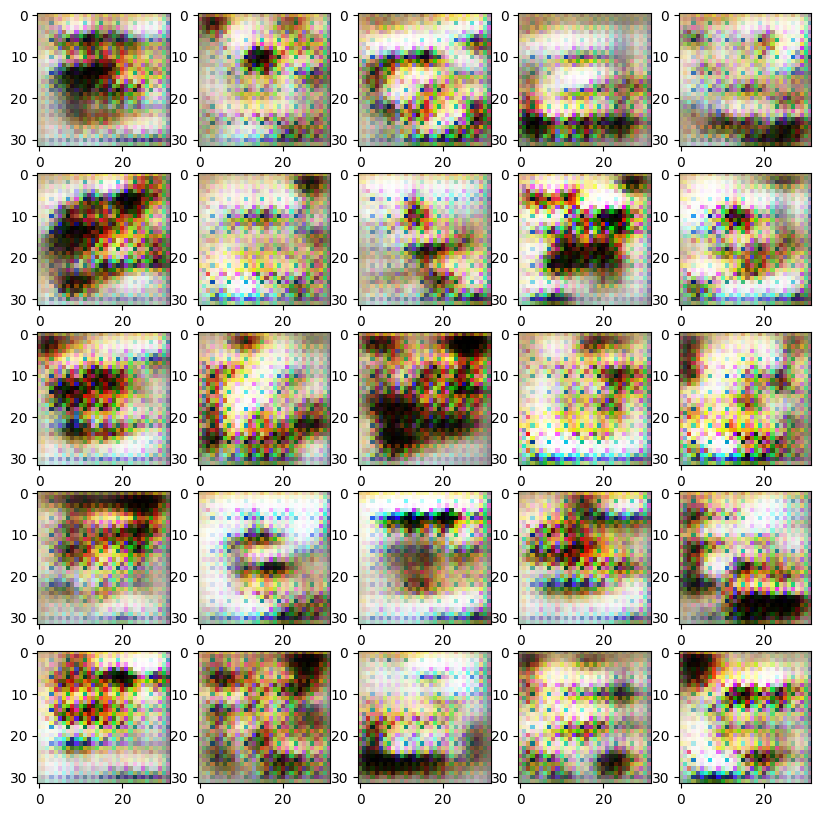

epoch 261
Generator avg loss:     0.6643166542053223
Discriminator avg loss: 0.7207242250442505
epoch 262
Generator avg loss:     0.6785354018211365
Discriminator avg loss: 0.7238253951072693
epoch 263
Generator avg loss:     0.6885542869567871
Discriminator avg loss: 0.7144704461097717
epoch 264
Generator avg loss:     0.6787382364273071
Discriminator avg loss: 0.7139710783958435
epoch 265
Generator avg loss:     0.6553997993469238
Discriminator avg loss: 0.7196154594421387
epoch 266
Generator avg loss:     0.6716614365577698
Discriminator avg loss: 0.7196673154830933
epoch 267
Generator avg loss:     0.6654504537582397
Discriminator avg loss: 0.7210452556610107
epoch 268
Generator avg loss:     0.6504446268081665
Discriminator avg loss: 0.7156102061271667
epoch 269
Generator avg loss:     0.667576789855957
Discriminator avg loss: 0.705736517906189
epoch 270
Generator avg loss:     0.668316662311554
Discriminator avg loss: 0.7096185684204102
epoch 271
Generator avg loss:     0.6532692

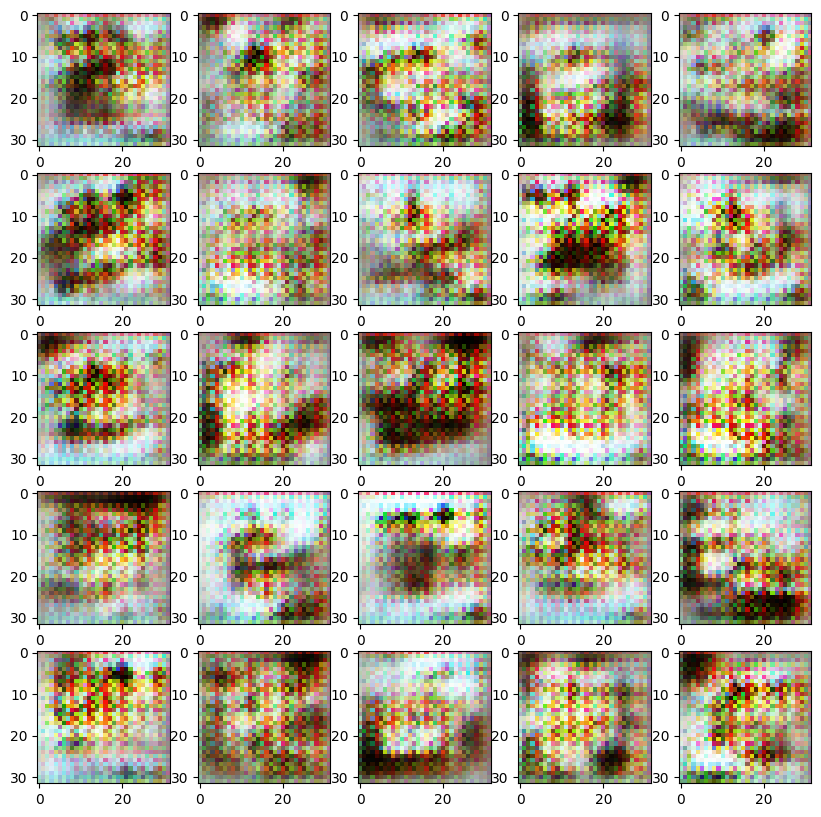

epoch 281


In [ ]:

CHECK_WEIGHTS = False

for epoch in range(251, 301):
    print(f"epoch {epoch}")
    gen_losses = []
    discr_losses = []
    for step, (real_inputs, real_targets) in enumerate(real_dataloader):
        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            print(step)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        discr_losses.append(train_disciminator(real_inputs, real_targets).detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, True)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        gen_losses.append(train_generator().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, False)

    print(f"Generator avg loss:     {np.mean(gen_losses)}")
    print(f"Discriminator avg loss: {np.mean(discr_losses)}")

    now = datetime.now()
    time = now.strftime('%d-%m-%Y_%H-%M-%S')
    if epoch%50 == 0 or (epoch%20 == 0 and epoch <= 200):
        generator.save(f"training\\models\\generator_{epoch}_{time}.keras")
        discriminator.save(f"training\\models\\discriminator_{epoch}_{time}.keras")

    if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
        imgs = generator.predict(validation_input)
        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()
        for img, ax in zip(imgs, axs):
            ax.imshow(img)
        plt.savefig(f"training\\results\\imgs_{epoch}_{time}.png")
        plt.show()
